In [52]:
#LIBRERIAS!!!!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

EJERCICIO 2

In [43]:
#creo los dataframe con las bases originales
df_2004=pd.read_stata('Individual_t104.dta')
#print(df_2004.head())
df_2024=pd.read_excel('usu_individual_T124.xlsx')
#print(df_2024.head())


In [44]:
#normalizo todas las columnas a minuscula y le saco espacios. Esto es porque uno esta en mayuscula y otro en minuscula y quiero quedarme con las columnas en comun para crear dataframe
df_2004.columns = df_2004.columns.str.lower().str.strip()
df_2024.columns = df_2024.columns.str.lower().str.strip()

#me quedo con los nombres de las columnas comunes a los dos dataframe (porque tienen diferencia de 1 en su len y sino no los puedo juntar)
columnas_comunes = []

# Recorrer cada columna en df_2004
for col in df_2004.columns:
    # Verificar si esa columna también está en df_2024
    if col in df_2024.columns:
        # Si la columna está en ambos DataFrames, agregarla a la lista
        columnas_comunes.append(col)
print(columnas_comunes)
#reordeno las columnas en los dos dataframe porque estan ordenadas distinto para poder juntarlos
df_2004 = df_2004[columnas_comunes]
df_2024 = df_2024[columnas_comunes]   

#junto los dataframe
df_final=pd.concat([df_2004, df_2024], ignore_index=True)


['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', '

2.a

In [45]:
#ahora voy a filtrar solo el conglomerado de gran buenos aires, es decir cuando region=1 o region='Gran Buenos Aires'
df_final=df_final[(df_final['region'] == 1) | (df_final['region'] =='Gran Buenos Aires')]
#me aseguro que este bien el año y trimestre
df_final=df_final[(df_final['ano4'] == 2004) | (df_final['ano4'] ==2024)]

df_final=df_final[(df_final['trimestre'] == '1er. Trimestre') | (df_final['trimestre'] ==1)]

#ahora voy a eliminar las columnas region y trimestre porque ya filtre lo que queria y ademas me voy a quedar solo con las columnas que vamos a usar 

columnas=['ano4','ch04','ch06','ch07','ch08','nivel_ed','estado','cat_inac','ipcf']
df_final=df_final[columnas]
print(df_final)

         ano4   ch04  ch06                   ch07  \
0      2004.0  Varón  79.0                  Viudo   
1      2004.0  Mujer  67.0  Separado o divorciado   
2      2004.0  Mujer  74.0                  Viudo   
3      2004.0  Varón  54.0                 Casado   
4      2004.0  Mujer  51.0                 Casado   
...       ...    ...   ...                    ...   
91334  2024.0      2    43                      3   
91335  2024.0      1    21                      5   
91336  2024.0      1    20                      5   
91337  2024.0      1    11                      5   
91338  2024.0      2    24                      5   

                                        ch08                         nivel_ed  \
0                 Obra social (incluye PAMI)            Secundaria Incompleta   
1                   No paga ni le descuentan                Primaria Completa   
2                 Obra social (incluye PAMI)                Primaria Completa   
3      Mutual/Prepaga/Servicio de emerg

2.b

In [46]:
#Voy columna por columna para que quede el mismo criterio en las mas importantes (2004 tienen codigo y 2024 el nombre) y que ver valores raros 

diccionario_CH04={'Varón':1,'Mujer':2}
diccionario_CH07={'Unido':1,'Casado':2,'Separado o divorciado':3,'Viudo':4,'Soltero':5}
diccionario_CH08={'Obra social (incluye PAMI)':1,'Mutual/Prepaga/Servicio de emergencia':2,'Planes y seguros públicos':3,'No paga ni le descuentan':4,'Ns./Nr.':9,'Obra social y mutual/prepaga/servicio de emergencia':12, 'Obra social y Planes y Seguros Públicos':13, 'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos':23, 'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos':123}
diccionario_nivel_educativo={'Primaria Incompleta (incluye educación especial)':1, 'Primaria Completa':2,'Secundaria Incompleta':3,'Secundaria Completa':4, 'Superior Universitaria Incompleta':5, 'Superior Universitaria Completa':6, 'Sin instrucción':7, 'Ns/Nr':9}
diccionario_estado={'Entrevista individual no realizada (no respuesta al cuestionario individual)':0, 'Ocupado':1, 'Desocupado':2,'Inactivo':3,'Menor de 10 años':4}
diccionario_cat_inac={'Jubilado/pensionado':1, 'Rentista':2,'Estudiante':3, 'Ama de casa':4,'Menor de 6 años':5,'Discapacitado':6,'Otros':7}

# Usar .map() para hacer el reemplazo y .fillna() para conservar los valores no mapeados
df_final['ch04'] = df_final['ch04'].replace(diccionario_CH04)
df_final['ch07'] = df_final['ch07'].replace(diccionario_CH07)
df_final['ch08'] = df_final['ch08'].replace(diccionario_CH08) #*
df_final['nivel_ed'] = df_final['nivel_ed'].replace(diccionario_nivel_educativo)
df_final['estado']= df_final['estado'].replace(diccionario_estado)  #*
df_final['cat_inac'] = df_final['cat_inac'].replace(diccionario_cat_inac)

#elimino valores no numericos en la columnas anteriores (se marcan con #* los que tienen este tipo de datos porque se cargó mal la información)
# Convertir a numérico y poner NaN en los valores no numéricos
df_final['ch08'] = pd.to_numeric(df_final['ch08'], errors='coerce')
# Eliminar las filas con NaN (que representan los valores no numéricos)
df_final = df_final.dropna(subset=['ch08'])


df_final['estado'] = pd.to_numeric(df_final['estado'], errors='coerce')
# Eliminar las filas con NaN (que representan los valores no numéricos)
df_final = df_final.dropna(subset=['estado'])

#elimino si existen valores negativos de ingresos y edad 
valores_unicos = df_final['ch06'].unique().tolist()
print(valores_unicos)

#elimino valores no numericos de edad "Menos de 1 año" y "Mas de 98" porque son poquitos y no puedo pasarlo a dato numerico 
df_final['ch06'] = pd.to_numeric(df_final['ch06'], errors='coerce')
df_final = df_final.dropna(subset=['ch06'])
df_final = df_final[df_final['ch06'] >= 0] #edad


df_final['ipcf'] = pd.to_numeric(df_final['ipcf'])


df_final = df_final[df_final['ipcf'] >= 0] #ingresos

print(df_final)

[79.0, 67.0, 74.0, 54.0, 51.0, 25.0, 20.0, 55.0, 48.0, 17.0, 15.0, 77.0, 50.0, 49.0, 26.0, 22.0, 18.0, 86.0, 62.0, 76.0, 45.0, 41.0, 21.0, 31.0, 19.0, 52.0, 12.0, 32.0, 29.0, 64.0, 10.0, 47.0, 43.0, 13.0, 3.0, 46.0, 78.0, 60.0, 59.0, 37.0, 44.0, 30.0, 63.0, 71.0, 87.0, 34.0, 14.0, 24.0, 28.0, 27.0, 69.0, 56.0, 33.0, 66.0, 61.0, 1.0, 92.0, 'Menos de 1 año', 65.0, 57.0, 23.0, 4.0, 40.0, 16.0, 9.0, 83.0, 6.0, 38.0, 75.0, 11.0, 53.0, 73.0, 39.0, 35.0, 7.0, 5.0, 36.0, 8.0, 82.0, 85.0, 72.0, 70.0, 89.0, 42.0, 2.0, 58.0, 68.0, 81.0, 80.0, 93.0, 96.0, 84.0, 90.0, 94.0, 88.0, '98 y más años', 91, -1, 95, 97]
         ano4  ch04  ch06  ch07  ch08  nivel_ed  estado  cat_inac   ipcf
0      2004.0     1  79.0     4   1.0         3     3.0       1.0  368.0
1      2004.0     2  67.0     3   4.0         2     1.0       0.0    0.0
2      2004.0     2  74.0     4   1.0         2     3.0       1.0  440.0
3      2004.0     1  54.0     2   2.0         2     1.0       0.0  532.5
4      2004.0     2  51.0   

/var/folders/g8/g1vdchxd3yz_0c31xgdfzg8c0000gn/T/ipykernel_36191/2815559664.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['ch04'] = df_final['ch04'].replace(diccionario_CH04)
/var/folders/g8/g1vdchxd3yz_0c31xgdfzg8c0000gn/T/ipykernel_36191/2815559664.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['ch07'] = df_final['ch07'].replace(diccionario_CH07)
/var/folders/g8/g1vdchxd3yz_0c31xgdfzg8c0000gn/T/ipykernel_36191/2815559664.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will

2.c

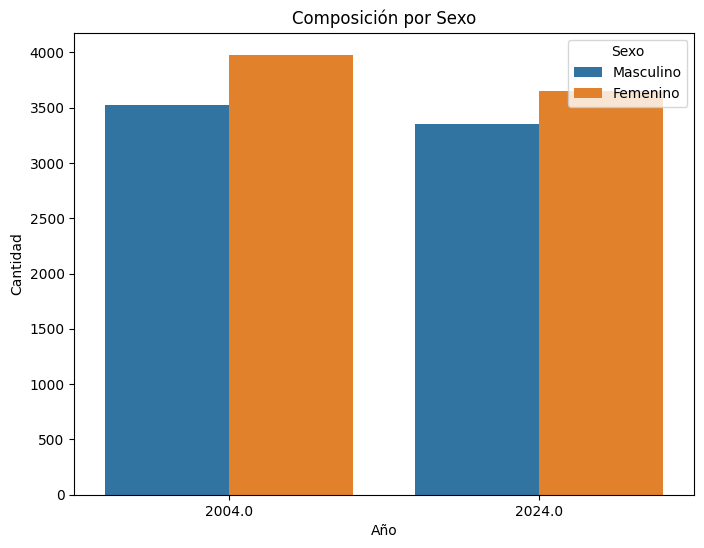

In [47]:
# Agrupa por año y sexo, y cuenta la cantidad
df_por_sexo = df_final.groupby(['ano4', 'ch04']).size().reset_index(name='counts')

# Crear el gráfico de barras
plt.figure(figsize=(8,6))

sns.barplot(x='ano4', y='counts', hue=df_por_sexo['ch04'].replace({1: 'Masculino', 2: 'Femenino'}), data=df_por_sexo)


# Añadir etiquetas
plt.title('Composición por Sexo')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.show()

2.d

<Axes: >

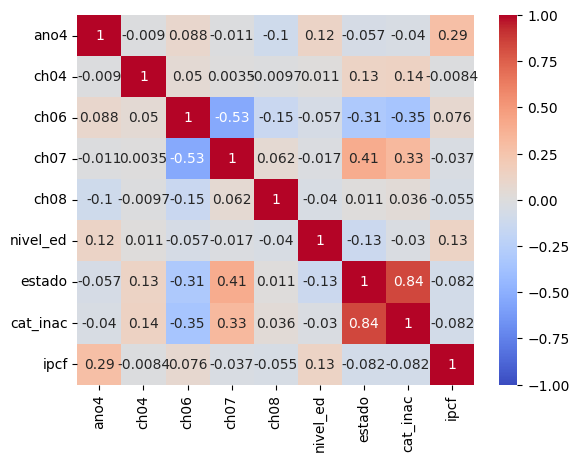

In [48]:
sns.heatmap(df_final.corr(),vmin=-1, vmax=+1, annot=True, cmap="coolwarm")

2.e 

In [49]:
# Cuenta de desocupados
desocupados = len(df_final[df_final['estado'] == 2])
print(f"Desocupados: {desocupados}")

#cuenta de inactivos 
inactivos = len(df_final[df_final['estado'] == 3])
print(f"Inactivos: {inactivos}")


diccionario_estado={'Entrevista individual no realizada (no respuesta al cuestionario individual)':0, 'Ocupado':1, 'Desocupado':2,'Inactivo':3,'Menor de 10 años':4}
# Media de IPCF por estado
media_ipcf = df_final.groupby('estado')['ipcf'].mean()
if 1 in media_ipcf.index:
    print("Media de IPCF para ocupado: ", media_ipcf[1])

if 2 in media_ipcf.index:
    print("Media de IPCF para desocupado: ", media_ipcf[2])

if 3 in media_ipcf.index:
    print("Media de IPCF para inactivo: ", media_ipcf[3])

Desocupados: 839
Inactivos: 5457
Media de IPCF para ocupado:  106477.05801944225
Media de IPCF para desocupado:  31655.95795031151
Media de IPCF para inactivo:  63921.35521107453


EJERCICIO 3

In [51]:
# Filtrar las observaciones donde respondieron (estado distinto a  0)
respondieron = df_final[df_final['estado'] != 0]

# Filtrar las observaciones donde no respondieron (estado = 0)
no_respondieron = df_final[df_final['estado'] == 0]

#  personas que no respondieron
no_respuesta = len(no_respondieron)
print(f"Personas que no respondieron su condición de actividad: {no_respuesta}")

#print(no_respondieron)

Personas que no respondieron su condición de actividad: 41
         ano4  ch04  ch06  ch07  ch08  nivel_ed  estado  cat_inac  ipcf
45688  2024.0     2  49.0     2   4.0         2     0.0       0.0   0.0
45689  2024.0     2  25.0     5   4.0         6     0.0       0.0   0.0
45690  2024.0     1  20.0     5   4.0         5     0.0       0.0   0.0
45698  2024.0     1  74.0     5   2.0         5     0.0       0.0   0.0
45699  2024.0     1  21.0     9   9.0         5     0.0       0.0   0.0
45700  2024.0     1  21.0     9   9.0         5     0.0       0.0   0.0
50853  2024.0     1  77.0     1   1.0         3     0.0       0.0   0.0
60530  2024.0     1  45.0     1   4.0         4     0.0       0.0   0.0
62385  2024.0     1  45.0     2   2.0         6     0.0       0.0   0.0
64772  2024.0     1  15.0     9   9.0         3     0.0       0.0   0.0
64773  2024.0     1  53.0     9   9.0         2     0.0       0.0   0.0
64774  2024.0     1  15.0     9   9.0         3     0.0       0.0   0.0
64775

Ejercicio 4

/var/folders/g8/g1vdchxd3yz_0c31xgdfzg8c0000gn/T/ipykernel_36191/2901207414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = np.where(respondieron['estado'].isin([1, 2]), 1, 0)


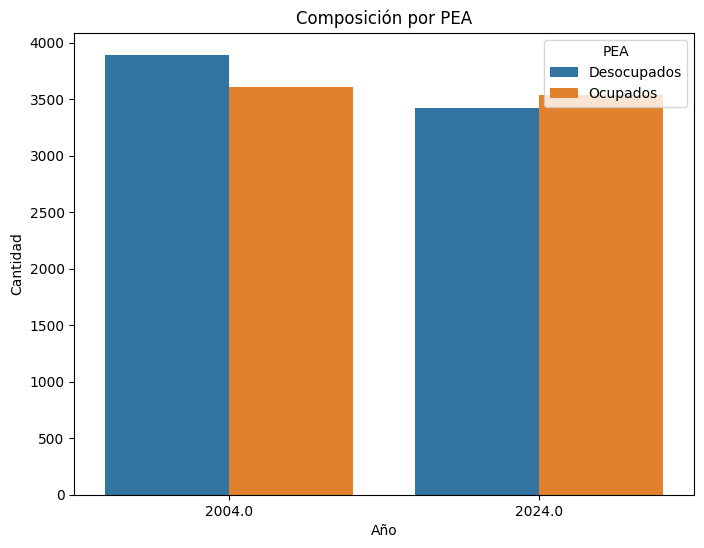

In [56]:
# Crear la columna PEA: 1 para ocupados (ESTADO = 1) o desocupados (ESTADO = 2), 0 para los demás
respondieron['PEA'] = np.where(respondieron['estado'].isin([1, 2]), 1, 0)
#print(respondieron)
# Agrupa por año y sexo, y cuenta la cantidad
df_pea = respondieron.groupby(['ano4', 'PEA']).size().reset_index(name='counts')

# Crear el gráfico de barras
plt.figure(figsize=(8,6))

sns.barplot(x='ano4', y='counts', hue=df_pea['PEA'].replace({1: 'Ocupados', 0: 'Desocupados'}), data=df_pea)


# Añadir etiquetas
plt.title('Composición por PEA')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='PEA')

# Mostrar el gráfico
plt.show()

